

<h3 align="center">DS-301 HW1</h3> 
<h3 align="center">Grace Yang (gy654, N10610063)</h3> 

# Problem1: Bias Variance Tradeoff


Read carefully the article at https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff. We will review this in Lab 2.
Let $y(x) = f(x) + ε$ be the measured relationship and $\hat{y} = g(x)$ be the model predicted value of y. Then MSE over test instance $x_i, i = 1,...,t$, is given by: $$MSE = \frac{1}{t}\sum_{i=1}^{t}(f(x_i)+\epsilon -g(x_i))^2$$
Recall that the expected mean squared error of a regression problem can be written as
$$E[MSE] = Bias^{2} + Variance + Noise$$
1. Consider the case when $f(x) = x + sin(1.5x)$ and $y(x) = f(x) + \mathcal{N}(0, 0.3)$, where $\mathcal{N}(0, 0.3)$ is normal distribution with mean 0 and standard deviation 0.3. Create a dataset of size 20 points by randomly generating samples from $y$. Display the dataset and $f(x)$. Use scatter plot for $y$ and smooth line plot for $f(x)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(-3.0, 8.0)

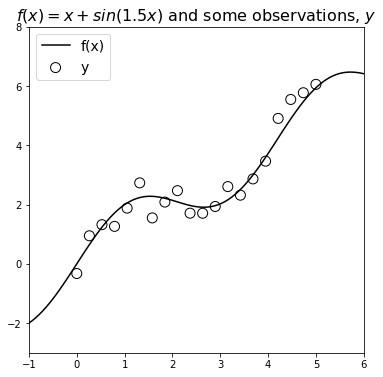

In [3]:

np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen', 'red']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 20
NOISE_STD = 0.3

x = np.linspace(0,5,20)
#x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1, 6, 100)


def f(x):
    """Base function"""
    return x+ np.sin(1.5 * x)


def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std


def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = x+sin(1.5 x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 6])
plt.ylim([-3, 8])

2. Use weighted sum of polynomials as an estimator function for $f(x)$, in particular, let the form of estimator function be: 
$$g_n(x)= \beta_0 + \beta_{1}x + \beta_{2}x^{2}+ \cdots +\beta_{n}x^{n}$$
Consider four candidate estimators, $g_1, g_3, g_5$ and $g_{10}$. Estimate the coefficients of each of the four estimators using the sampled dataset and plot $y(x), f(x), g_1(x), g_3(x), g_{10}(x)$. Which estimator is underfitting? Which one is overfitting?

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

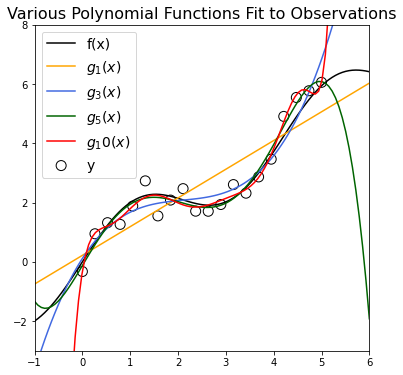

In [4]:
plot_fx_data(y)
polynomial_degrees = [1, 3, 5, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{degree}(x)$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 6])
plt.ylim([-3, 8])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)


$g_{1}(x)$ is underfitting and $g_{10}(x)$ is overfitting, $g_{3}(x)$ is a pretty good fit

3. Generate 100 datasets (each of size 50) by randomly sampling from $y$
(a) Next fit the estimators of varying complexity, o.e., $g_1, g_2, ...g_{15}$ using the training set for each dataset. Then calculate and plot the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity.
(b) Identify the best model, i.e. the model with the smallest Mean Squared Error. What is the value of bias and variance for this model

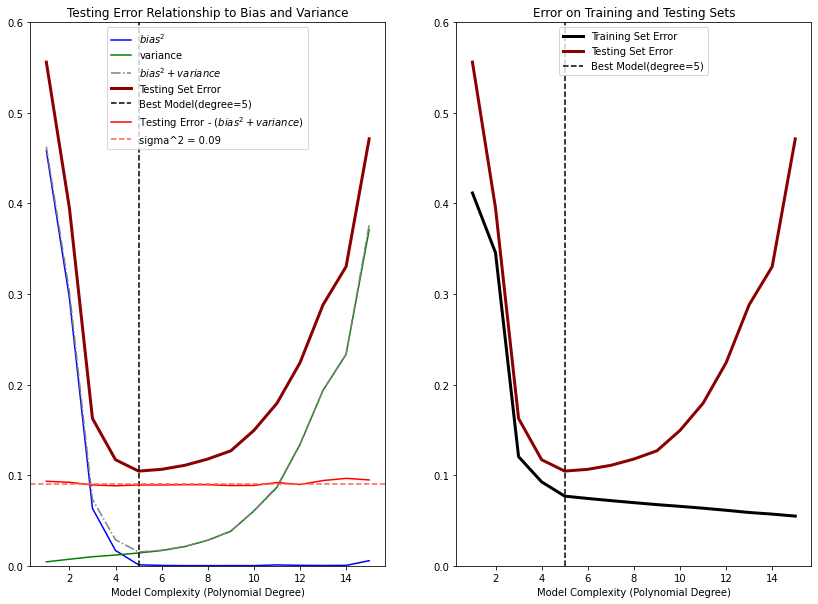

In [8]:
from collections import defaultdict

np.random.seed(124)
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 15  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .3
percent_train = .9
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
x = np.linspace(0, 5, 100)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)


def error_function(pred, actual):
    return (pred - actual) ** 2

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    x_train = np.random.permutation(x_train)
    x_train = x_train[:40]
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

MSE = np.array(bias_squared) + np.array(variance)
# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, MSE,  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'sigma^2 = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, 0.6])
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6])
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

In [9]:
print(f'bias_squared:{bias_squared[5]}')
print(f'variance:{variance[5]}')
print(f'MSE:{MSE[5]}')

bias_squared:0.0004206646990670677
variance:0.016820549151592593
MSE:0.017241213850659663


The best model is $g_{5}(x)$.  $bias^{2}$ =0.0004206646990670677, variance = 0.016820549151592593, MSE = 0.017241213850659663

# Problem2: KNN hyperparameter tuning using cross validation 

For this problem you should read the article at: https://www.analyticsvidhya.com/blog/2021/01/a-quickintroduction-to-k-nearest-neighbor-knn-classification-using-python/ to review how to work with K-Nearest
Neighbor (KNN) in sklearn. We will use the same Social Network ads dataset that is used in this post. You will work with a 80-20 train-test split.
You will use KNN algorithm to predict whether an individual will buy a product or not. As discussed in the class, there are two hyperparameters: the number of neighbors (K) and the distance metric. For distance
between two n-dimensional points $\bar{x1} = {x1,1, x1,2, . . . , x1,n}$ and $\bar{x2} = {x2,1, x2,2, . . . , x2,n}$ we consider Minkowski distance given by:
$$(\sum_{i=1}^{n}|x_{1, i}-x_{2, i}|^{p})^{1/p}$$
where $p$ is a parameter. For $p=2$, this distance is same as Euclidean distance and for $p=1$ it is called Manhattan distance. 


1. With $K=4$ and $p=2$ train a KNN classifier and evaluate its misclassification error, Accuracy, Precison, Recall, F-1 score on the test set.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [16]:
dataset = pd.read_csv('./Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ac = accuracy_score(y_test,y_pred)
misclassification_error = 1-ac
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'misclassification error:{misclassification_error}, Accuracy:{ac},Precision:{precision}, Recall:{recall}, F-1 score:{f1} on the test set')
cm = confusion_matrix(y_test, y_pred)

misclassification error:0.125, Accuracy:0.875,Precision:0.8928571428571429, Recall:0.78125, F-1 score:0.8333333333333334 on the test set


2. You will use 5-fold cross-validation to identify the best value of K. First fix $p=1$ and for $K \in [1,2,...,15]$ calculate the misclassification error and plot it as a function of $K$ for different values of $K$

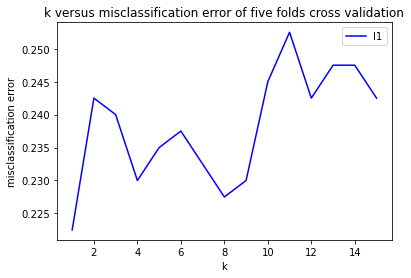

In [14]:
from sklearn.model_selection import cross_val_score
def plot_cross_validation_mis_error(p, color):
  mis_error = []
  for k in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = p)
    misclassification_error = 1- cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
    mis_error.append(np.mean(misclassification_error))
  k = range(1, 16)
  plt.plot(k, mis_error, color = color, label = f'l{p}')
  plt.title('k versus misclassification error of five folds cross validation')
  plt.xlabel('k')
  plt.ylabel('misclassification error')
  plt.legend()
plot_cross_validation_mis_error(1, 'blue')


3. Next fix p = 2 and again using 5-fold cross-validation for $K \in [1,2,...15]$ calculate the misclassification error and plot it as a function of $K$. This should be plotted in the same graph as for $p=1$ in part 2 of the problem.

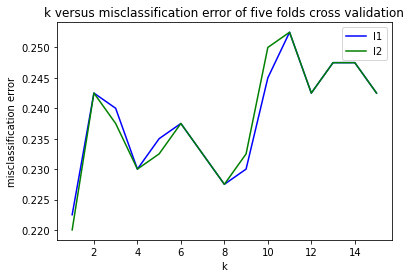

In [16]:
plot_cross_validation_mis_error(1, 'blue')
plot_cross_validation_mis_error(2, 'green')

4. What is the best value of $K$ with Eucledian distance? Is this value the same with Manhattan distance? What combination of p and $K$ gives the best classifier (one with the minimum misclassification error).

For cross validation you will use cross_val_score from sklearn. For reference you can look at this post where parameter tuning is done in KNN using cross_val_score. 





The best value K with Euclidean distance is K = 1. This is the same with Manhattan distance. P = 2, K = 1 give the best classifier with the minimum misclassification error.

# Problem 3: Which Algorithm is Better?
See PDF that contains the theoretical part of the assignment.

# Problem4 - Logistic Regression with Regularization

Regularization with linear regression will be covered in Lab2. How we are doing regularization with logistiv regression using the IRIS dataset. The dataset was introduced to younin lab1

1. Read documentation of sci-kit learn on LogisticRegression class and understand its parameters. In sci-kit learn LogisticRegression class takes different parameters: C, solver, penalty, and multi-class. Explain the significance of each of these parameters and their possible values. 


- C: float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones; For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;‘liblinear’ is limited to one-versus-rest schemes.

- penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:'none': no penalty is added;'l2': add a L2 penalty term and it is the default choice;'l1': add a L1 penalty term;'elasticnet': both L1 and L2 penalty terms are added.

- multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

2. The parameter penalty of LogisticRegression class in sklearn specifies the type of regularization. What is the meaning of 'l1' and 'l2' penalty? 

- L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients); Some coefficients can become zero and eliminated. Lasso regression uses this method.
$$argmin_{f} \sum_{i=1}^{n}(y_i-f(x_i))^{2} + \lambda \sum_{j=1}^{p}|\beta_{j}|$$

- L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values.
$$argmin_{f} \sum_{i=1}^{n}(y_i-f(x_i))^{2} + \lambda \sum_{j=1}^{p}\beta_{j}^{2}$$

3. Using penalty = 'l1' and penalty = 'l2' fit 10 logistic regression models one for each of 10 different values of C (total 20 models, 10 for 'l1' and 10 for 'l2'), with C = $10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10, 100, 1000, 10000, 100000$ and multi_class = 'ovr'. Collect the weight coefficients for the two features (petal width and petal length) of class 0 and 2 and plot them for different values of C. What is your observation from these grphs for 'l1' and 'l2' penalty? 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [19]:
def load_iris_and_split():
  iris = load_iris()
  X = iris.data 
  y = iris.target 
  names = iris.target_names
  feature_names = iris.feature_names
  print(f'features:{feature_names}')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_iris_and_split()


def find_weight(C_list, penalty_list, X_train, y_train):
  weight_dict = {}
  for penalty in penalty_list:
    weight0_list = []
    weight2_list = []
    for C in C_list:
      clf = LogisticRegression(solver = 'liblinear', random_state = 0, penalty = penalty, C = C, multi_class = 'ovr')
      clf.fit(X_train, y_train)
      coef_0 = clf.coef_[:, 2:4][[0]]
      coef_2 = clf.coef_[:, 2:4][[2]]
      #print(f'what is coef0:{coef_0}') # weights of petal length and petal width foe class 0
      weight0_list.append(coef_0)
      weight2_list.append(coef_2)
    weight_dict[f'{penalty}_c0'] = weight0_list
    weight_dict[f'{penalty}_c2'] = weight2_list
  #print(f'what is weight_dict:{weight_dict}')
  l1_c0 = np.array(weight_dict['l1_c0']).transpose()[:, 0, :]
  l1_c2 = np.array(weight_dict['l1_c2']).transpose()[:, 0, :]
  l2_c0 = np.array(weight_dict['l2_c0']).transpose()[:, 0, :]
  l2_c2 = np.array(weight_dict['l2_c2']).transpose()[:, 0, :]
  #print(l1_c0)
  return l1_c0, l1_c2, l2_c0, l2_c2

C_list = [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 10000, 100000]
penalty_list = ['l1', 'l2']
l1_c0, l1_c2, l2_c0, l2_c2 = find_weight(C_list, penalty_list, X_train, y_train)

features:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


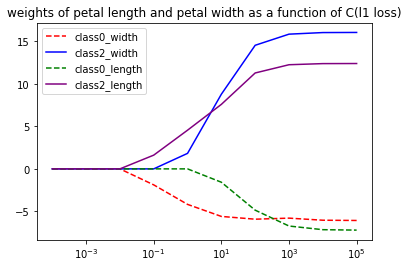

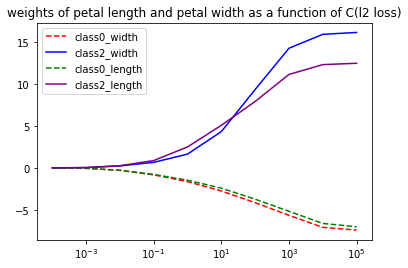

In [20]:
def petal_length_weights_against_C_for_both_class_l1(l1_c0, l1_c2, C_list):
    plt.plot(C_list, l1_c0[0],color = 'red', label = 'class0_width', linestyle='dashed')
    plt.plot(C_list, l1_c2[0],color = 'blue', label = 'class2_width')
    plt.plot(C_list, l1_c0[1],color = 'green', label = 'class0_length', linestyle='dashed')
    plt.plot(C_list, l1_c2[1],color = 'purple', label = 'class2_length')
    plt.xscale('log')
    plt.legend()
    plt.title('weights of petal length and petal width as a function of C(l1 loss)')
    plt.show()

def petal_length_weights_against_C_for_both_class_l2( l2_c0, l2_c2, C_list):
    plt.plot(C_list, l2_c0[0],color = 'red', label = 'class0_width',linestyle='dashed')
    plt.plot(C_list, l2_c2[0],color = 'blue', label = 'class2_width')
    plt.plot(C_list, l2_c0[1],color = 'green', label = 'class0_length', linestyle='dashed')
    plt.plot(C_list, l2_c2[1],color = 'purple', label = 'class2_length')
    plt.xscale('log')
    plt.legend()
    plt.title('weights of petal length and petal width as a function of C(l2 loss)')
    plt.show()
petal_length_weights_against_C_for_both_class_l1(l1_c0, l1_c2, C_list) 
petal_length_weights_against_C_for_both_class_l2(l2_c0, l2_c2, C_list) 

Observations:
- petal width and petal length weights for class 0 is negative. Petal width and petal length weights for class 2 is positive
- As parameter C increases, the magnitude of weights for petal length and petal width increase under both l1 and l2 loss. 
- The magnitude of weights for both petal length and petal width increases more smoothly under l2 norm. Under l1 norm, coefficients of less significant features can be zero. 

4. Let $\beta_C$ denoe the weight coefficients learned for a model for a given C. Calculate the ratio $\frac{||\beta_{C}||_2}{||\beta_{100000}||_{2}}$ (the double brackets indicate the L2 norm) for each value of C and penalty 'l1' and 'l2'. Plolt this ratio on x-axis and value of the four coefficients on y-axis for different values of C. You will get similar graphs as we discussed in the class for regularization with linear regression. This will show ou how the ratio between the total magnitude of coefficients with varying degrees of regularization and with C = 100000. What is your observation from these graphs for 'l1' and 'l2' penalty?

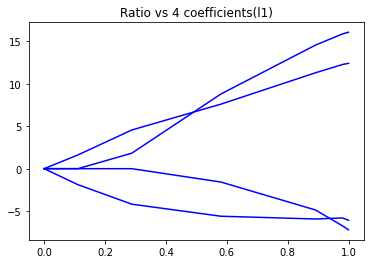

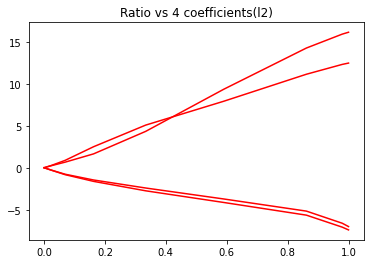

array([4.15505049e-04, 3.86494130e-03, 2.36773508e-02, 6.92468719e-02,
       1.62622126e-01, 3.33735598e-01, 5.90035490e-01, 8.61626350e-01,
       9.79341273e-01, 1.00000000e+00])

In [24]:
from scipy.linalg import norm
beta_100000 = {}
def ratio_coef(penalty, color):
  clf = LogisticRegression(solver = 'liblinear', random_state = 0, penalty = penalty, C = 100000, multi_class = 'ovr')
  clf.fit(X_train, y_train)
  coef = clf.coef_
  coef = coef[:, 2:4][[0,2]].flatten()
  beta_100000[f'penalty{penalty}'] = norm(coef, 2)
  beta_C_list = []
  coef_list = []
  for C in C_list:
    clf = LogisticRegression(solver = 'liblinear', random_state = 0, penalty = penalty, C = C, multi_class = 'ovr')
    clf.fit(X_train, y_train)
    coef = clf.coef_
    coef = coef[:, 2:4][[0,2]].flatten()
    coef_list.append(coef)
    beta_C_list.append(norm(coef, 2))
  ratio = np.array(beta_C_list)/beta_100000[f'penalty{penalty}']
  plt.plot(ratio,coef_list, color = color)
  plt.title(f'Ratio vs 4 coefficients({penalty})')
  plt.show()
  return ratio

ratio_coef('l1', 'blue')
ratio_coef('l2',  'red' )




As inverse of regularization strength C increases, $||\beta_C|| _{2}$ increases, so is the ratio $\frac{||\beta_{C}||_2}{||\beta_{100000}||_{2}}$, the magnitude of prediction weeights gets larger, suggesting that the model overfits and memorizes more of the training data and make inference less generally.

# Problem5 Algorihmic Performance Scaling




OpenML has thousands of datasets for classification tasks. Select any sufficiently large (having greater than 50 K instances) dataset from OpenML with multiple (greater than2 ) output classes.

1. Summarize the attributes of the selected dataset: number of features, number of numerical features, numer of categorical features. Is the dataset balanced? Plot the distribution of number of samples per class.


- data source: https://www.openml.org/search?type=data&status=active&sort=qualities.NumberOfInstances&id=40685
- number of instances: 58000
- number of features: 10
- number of output classes: 7
- number of numerical features: 9 A1-A9 are all numerical
- number of categorical features: class (target) has 7 distinct values
- Is the dataset balanced?: Approximately 80% of the data belongs to class 1. Therefore the default accuracy is about 80%.
- distribution of number of samples per class



In [53]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score


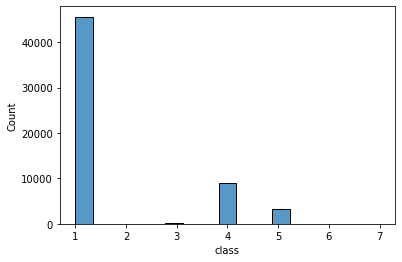

In [54]:

data_path = './shuttle.arff'
def read_data_see_label_dist(data_path):
  dataset, meta = arff.loadarff(data_path)
  shuttle = pd.DataFrame(dataset)
  shuttle['class'] = [int(shuttle['class'][i]) for i in range(len(shuttle['class']))]
  y = shuttle['class']
  y = pd.Series(y)
  X = shuttle.drop(['class'], axis = 1)
  sns.histplot(data=shuttle, x="class")
  return shuttle
shuttle = read_data_see_label_dist(data_path)

2. For each dataset, select 80% of data as training set and remaining 20% as test set. Generate 10 different subsets of the training set by randomly subsampling 10%, 20%, . . . , 100% of the training set. Use each of these subsets to train two different classifiers: Decision Tree and Gradient boosting in sklearn. You will work with default hyperparameters for these classifiers in sklearn. When training a classifier also measure the wall clock time to train. After each training, evaluate the accuracy of trained models on the test set. Report model accuracy and training time for each of the 10 subsets of the training set for the two models in a table.

In [55]:


def split_and_learning_curve_exp(sampling_frac, data):
  train, test = train_test_split(data, test_size=0.2,shuffle = True, stratify = shuttle['class'])
  y_test = test['class']
  X_test = test.drop(['class'], axis = 1)
  accuracy_tree = []
  rt_tree = []
  accuracy_gb = []
  rt_gb = []
  for frac in sampling_frac:
    train_subset = train.sample(frac=frac)
    train_subset_y = train_subset['class']
    train_subset_X = train_subset.drop(['class'], axis = 1)

    start = time.time()
    tree_clf = tree.DecisionTreeClassifier().fit(train_subset_X, train_subset_y)
    stop = time.time()
    rt_tree.append([frac, stop-start])
    y_pred = tree_clf.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    accuracy_tree.append([frac, ac])
    
    start = time.time()
    gb_clf = GradientBoostingClassifier().fit(train_subset_X, train_subset_y)
    stop = time.time()
    rt_gb.append([frac, stop - start])
    y_pred= gb_clf.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    accuracy_gb.append([frac, ac])


  print(f'accuracy_tree:{accuracy_tree}')
  print(f'running_time_tree:{rt_tree}')
  print(f'accuracy_gb:{accuracy_gb}')
  print(f'running_time_gb:{rt_gb}')
  return accuracy_tree, rt_tree, accuracy_gb, rt_gb


sampling_frac = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracy_tree, rt_tree, accuracy_gb, rt_gb = split_and_learning_curve_exp(sampling_frac, shuttle)


accuracy_tree:[[0.1, 0.998448275862069], [0.2, 0.9991379310344828], [0.3, 0.9995689655172414], [0.4, 0.9995689655172414], [0.5, 0.9998275862068966], [0.6, 0.9993965517241379], [0.7, 0.9997413793103448], [0.8, 0.9998275862068966], [0.9, 0.9999137931034483], [1, 0.9997413793103448]]
running_time_tree:[[0.1, 0.028809070587158203], [0.2, 0.01706385612487793], [0.3, 0.031362056732177734], [0.4, 0.04153800010681152], [0.5, 0.06308794021606445], [0.6, 0.05337190628051758], [0.7, 0.0906670093536377], [0.8, 0.07738995552062988], [0.9, 0.08749508857727051], [1, 0.1792280673980713]]
accuracy_gb:[[0.1, 0.9983620689655173], [0.2, 0.9991379310344828], [0.3, 0.9997413793103448], [0.4, 0.9999137931034483], [0.5, 0.9997413793103448], [0.6, 0.9997413793103448], [0.7, 0.9998275862068966], [0.8, 1.0], [0.9, 0.9997413793103448], [1, 0.9997413793103448]]
running_time_gb:[[0.1, 4.842558860778809], [0.2, 11.403411149978638], [0.3, 12.614427089691162], [0.4, 19.97649598121643], [0.5, 23.916553258895874], [0.6,

3. Using the data collected in part 2 you will create learning curve for the two classifiers. A learning curve shows how the accuracy changes with increasing size of training data. You will create one chart with horizontal axis being the percentage of training set and vertical axis being the accuracy on test set. On this chart you will plot learning curve for Decision Tree and Gradient Boosting.

In [56]:
def transpose_data(accuracy_tree, rt_tree, accuracy_gb, rt_gb):
  frac = np.array(accuracy_tree).transpose()[0]
  tree_acc = np.array(accuracy_tree).transpose()[1]
  tree_rt = np.array(rt_tree).transpose()[1]
  gb_acc = np.array(accuracy_gb).transpose()[1]
  gb_rt = np.array(rt_gb).transpose()[1]
  return frac, tree_acc,tree_rt , gb_acc, gb_rt
frac, tree_acc,tree_rt , gb_acc, gb_rt = transpose_data(accuracy_tree, rt_tree, accuracy_gb, rt_gb)

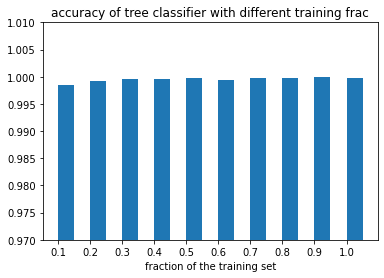

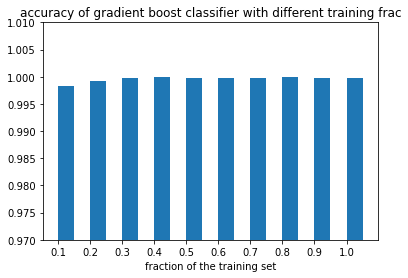

In [57]:
def bar_plot_acc(clf_name, acc):
  plt.bar(frac,acc, width = 0.05, align='edge')
  plt.ylim(0.97, 1.01)  
  plt.xticks(frac) 
  plt.xlabel(f'fraction of the training set')
  plt.title(f'accuracy of {clf_name} classifier with different training frac')
  plt.show()


bar_plot_acc('tree', tree_acc)
bar_plot_acc('gradient boost',gb_acc)


4. Next using the data collected in part 3 you will create a chart showing the training time of classifiers with increasing size of training data. So, for each classifier you will have one plot showing the training time as a function of training data size.

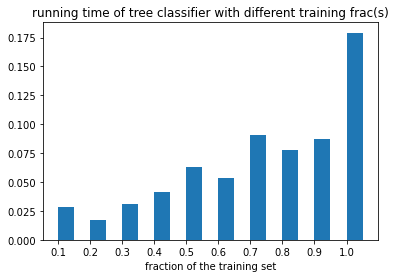

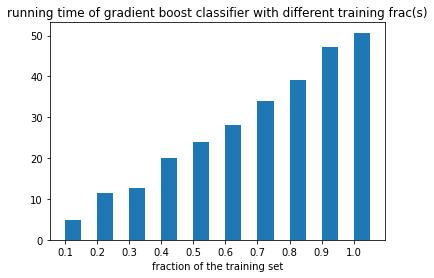

In [58]:
def bar_plot_rt(clf_name, rt):
  plt.bar(frac,rt, width = 0.05, align='edge')
  plt.xticks(frac) 
  plt.xlabel(f'fraction of the training set')
  plt.title(f'running time of {clf_name} classifier with different training frac(s)')
  plt.show()
bar_plot_rt('tree', tree_rt)
bar_plot_rt('gradient boost',gb_rt)

5. Study the scaling of training time and accuracy of classifiers with training data size using the two figures generated in part 3 and 4 of this problem. Compare the performance of classifiers in terms of training time and accuracy and write 3 main observations. Which gives better accuracy ? Which has shorter training time ? 

In [59]:
tree_acc

array([0.99844828, 0.99913793, 0.99956897, 0.99956897, 0.99982759,
       0.99939655, 0.99974138, 0.99982759, 0.99991379, 0.99974138])

In [60]:
gb_acc

array([0.99836207, 0.99913793, 0.99974138, 0.99991379, 0.99974138,
       0.99974138, 0.99982759, 1.        , 0.99974138, 0.99974138])

Observations:
- The training accuracy of both classifiers improve slightly as the fraction of the training set increases from 0.1 to 1, but the accuracy of both classifiers are pretty decent at fraction = 0.1. The highest accuracy of the two classifiers are the same:L 0.99982759.
- The training time of both classifiers increases as the fraction of the training set increases from 0.1 to 1.
- the gradient boost classifier takes longer time to train than the tree classifier. When the fraction is controlled as 1, the gradient boost takes 30 seconds to train compared with 0.1 second of the tree classifier. The longer training time for the gradient boost classifier makes is harder to scale with the input size compared with the tree classifier. 